## End-to-End Youtube Sentiment Analysis 🎬🎥


1. Problem 🚩
* By categorizing opinions expressed in a piece of text, will my model be able to categorize them correctly into positive,negative or neutral?

2. Data 🗃️

Will be collected using Youtube API.
Tthe video we're going to get the comments from is this one:https://www.youtube.com/watch?v=Qb4JWRBF80A

*Disclaimer note* This is Donald's Trump first speech and world reaction, so I just thought it would be intersting to analyze how does people feel about this.😊

3. Evaluation 📊
A model for sentiment analysis following these steps:
* Text mining
* Text Transformation and Normalization
* Text Vextorization
* Sentiment Model

# Importing libraries

In [ ]:
!pip install datasets
!pip install emoji
!pip install transformers
!pip install pickle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
import os
import emoji
import pickle
# Import functions for data preprocessing and data preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('punkt_tab')
nltk.download('wordnet')

import os
os.environ["WANDB_MODE"] = "disabled"
from transformers import EarlyStoppingCallback

import string
from string import punctuation
import nltk
import re

from transformers import RobertaForSequenceClassification, RobertaTokenizer, Trainer, TrainingArguments, pipeline
from datasets import Dataset
import pandas as pd
from sklearn.metrics import accuracy_score
import gc  # Garbage collection for memory management
from transformers import RobertaForSequenceClassification, RobertaTokenizer, Trainer, TrainingArguments, pipeline
from datasets import Dataset
from sklearn.metrics import accuracy_score
import gc
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import pipeline
from transformers import RobertaForSequenceClassification, RobertaTokenizer, Trainer, TrainingArguments
from datasets import Dataset
from sklearn.metrics import accuracy_score



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# Pull Comments

In [ ]:
import googleapiclient.discovery
import googleapiclient.errors

api_service_name = "youtube"
api_version = "v3"
DEVELOPER_KEY = "Your API"

youtube = googleapiclient.discovery.build(
    api_service_name, api_version, developerKey = DEVELOPER_KEY)

request = youtube.commentThreads().list(
    part="snippet",
    videoId="Qb4JWRBF80A",
    maxResults = 2000

)
response = request.execute()

for item in response["items"]:
    print(item["snippet"]["topLevelComment"]["snippet"]["textDisplay"])

i think 8O
how old is he????
Mr Trump gives us announcements when you are on rolling the law we will make our time to do/achieve our golden goals generation opportunity for all of the world in the future as well to make it happen and thanks again
People...Some of the dems are clapping. There is hope for them!
<a href="https://www.youtube.com/watch?v=Qb4JWRBF80A&amp;t=590">9:50</a> Biden looks like he’s about to cry
His son sees exactly what’s happening
WONDER HOW MANY ILEGAL IMMIGRANTS WORK INSIDE JEFF CO. WHY DONT ANYONE LOOK INSIDE THERE
When he said he’s putting America first, no democrat clapped. Judy shows what they think of us
finally i can have money in my pocket and buy a house.... no more group of people buying homes and not letting us buy a home of our own.. thanks mr trump
Homosexuality, transgenderism and sodomy are the greatest danger to the world, humanity and family.
<b>Nobel Peace Prize. The return of all Palestinians to a Palestinian state within the 1967 borders, with

## Output as Pandas DataFrame

In [ ]:
#Since the last code worked, let's now switch this into a dataframe so we can work on this data!
api_service_name = "youtube"
api_version = "v3"
DEVELOPER_KEY = "Your API"

youtube = googleapiclient.discovery.build(
    api_service_name, api_version, developerKey=DEVELOPER_KEY)

request = youtube.commentThreads().list(
    part="snippet",
    videoId="Qb4JWRBF80A",
    maxResults = 2000
)
response = request.execute()

comments = []

for item in response['items']:
    comment = item['snippet']['topLevelComment']['snippet']
    comments.append([
        comment['authorDisplayName'],
        comment['publishedAt'],
        comment['updatedAt'],
        comment['likeCount'],
        comment['textDisplay']
    ])

df = pd.DataFrame(comments, columns=['author', 'published_at', 'updated_at', 'like_count', 'text'])

df.head(10)




,author,published_at,updated_at,like_count,text
0,@gunbileg1234hh,2025-02-10T12:38:08Z,2025-02-10T12:38:08Z,0,i think 8O
1,@gunbileg1234hh,2025-02-10T12:36:52Z,2025-02-10T12:36:52Z,0,how old is he????
2,@abushrara9504,2025-02-09T03:17:51Z,2025-02-09T03:17:51Z,0,Mr Trump gives us announcements when you are o...
3,@Hristiyan1991,2025-02-08T09:51:17Z,2025-02-08T09:51:17Z,0,People...Some of the dems are clapping. There ...
4,@Blerbon86,2025-02-07T03:49:33Z,2025-02-07T03:49:33Z,0,"<a href=""https://www.youtube.com/watch?v=Qb4JW..."
5,@Mrs.julion,2025-02-05T16:23:36Z,2025-02-05T16:23:48Z,0,His son sees exactly what’s happening
6,@richeyrich3655,2025-02-05T11:07:50Z,2025-02-05T11:07:50Z,0,WONDER HOW MANY ILEGAL IMMIGRANTS WORK INSIDE ...
7,@bostonnate4024,2025-02-03T19:42:19Z,2025-02-03T19:42:19Z,0,"When he said he’s putting America first, no de..."
8,@chrisburgos4619,2025-02-03T04:22:13Z,2025-02-03T04:22:13Z,0,finally i can have money in my pocket and buy ...
9,@رلوتوززنةاللاةانت,2025-02-02T11:35:04Z,2025-02-02T17:33:12Z,0,"Homosexuality, transgenderism and sodomy are t..."


# Data labelling
Ssince all of our data is raw, we don't have the slightest idea of what comments are positive, negative or neutral, so we have to assign those values before proceeding.

We'll use avery common python code for these tyoes of scenarios.

In [ ]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["text"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["text"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["text"]]
df['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in df["text"]]
score = df["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append('Positive')
    elif i <= -0.05 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
df["Sentiment"] = sentiment
df.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,author,published_at,updated_at,like_count,text,Positive,Negative,Neutral,Compound,Sentiment
0,@gunbileg1234hh,2025-02-10T12:38:08Z,2025-02-10T12:38:08Z,0,i think 8O,0.000,0.000,1.000,0.0000,Neutral
1,@gunbileg1234hh,2025-02-10T12:36:52Z,2025-02-10T12:36:52Z,0,how old is he????,0.000,0.000,1.000,0.0000,Neutral
2,@abushrara9504,2025-02-09T03:17:51Z,2025-02-09T03:17:51Z,0,Mr Trump gives us announcements when you are o...,0.170,0.000,0.830,0.7783,Positive
3,@Hristiyan1991,2025-02-08T09:51:17Z,2025-02-08T09:51:17Z,0,People...Some of the dems are clapping. There ...,0.242,0.000,0.758,0.4926,Positive
4,@Blerbon86,2025-02-07T03:49:33Z,2025-02-07T03:49:33Z,0,"<a href=""https://www.youtube.com/watch?v=Qb4JW...",0.198,0.246,0.556,-0.1531,Negative


Let's quickly break down what's going on in this code, remember that up until this point, we didn't have the slightest idea of how to classify our comments. So what to do?

Imagine having a tool that can instantly tell you if a sentence is happy, sad, or just neutral. Well, SentimentIntensityAnalyzer from the VADER sentiment analysis tool does exactly that! 🙌 It’s part of the nltk library and is great for analyzing text that mixes casual language-like in this case-, reviews, or even tweets. 🐦

**The Magic Method**: polarity_scores() ✨
When you pass your text through the analyzer, it gives you back a dictionary of scores. These tell you how "positive", "negative", or "neutral" the text is, plus an overall score that wraps it all up:

* "pos": How positive is the text? (+)
* "neg": How negative is the text? (😡)
* "neu": How neutral is the text? (😐)
* "compound": The overall mood score that combines all of the above! It’s a * * * score from -1 (super negative) to +1 (super positive) 🌈

**Applying It to Your Data** 📊

In this partucular code, we're using this analyzer to check the mood of text in our df["text"] column. The analyzer then creates new columns to store those scores:

* **"Positive"** (How much of the text is positive? 💖)
* **"Negative"** (How much of the text is negative? 😩)
* **"Neutral"** (How much of the text is just “meh”? 😶)
* **"Compound"** (The overall vibe score! 🎢)

**Classifying the Mood** 🎭
The compound score is like the final verdict on the mood of your text:

**Positive** if the compound score is 0.05 or higher (yay, good vibes! 😄)
**Negative** if it’s -0.05 or lower (uh-oh, bad vibes! 😞)
**Neutral** for scores in between (just chill 😌)

**The End Result** 🎉

The text gets tagged with its official mood in a new Sentiment column: "Positive," "Negative," or "Neutral"!

So in a nutshell, SentimentIntensityAnalyzer is your text's personal mood reader, breaking down the vibes and categorizing them based on its scores. Pretty cool, right? 😎





# Dataframe Overview

In [ ]:
#Let's check how many comments we have
print(f"Total number of comments: {len(df)}")

Total number of comments: 100


In [ ]:
# Great! Now, before commencing the overview let's drop the polarity columns. Now that we know what the sentiment is, and have a special column for that, there is no need to kepp them.
df = df.drop(['Positive', 'Negative', 'Neutral', 'Compound'], axis=1)
df.head()

,author,published_at,updated_at,like_count,text,Sentiment
0,@gunbileg1234hh,2025-02-10T12:38:08Z,2025-02-10T12:38:08Z,0,i think 8O,Neutral
1,@gunbileg1234hh,2025-02-10T12:36:52Z,2025-02-10T12:36:52Z,0,how old is he????,Neutral
2,@abushrara9504,2025-02-09T03:17:51Z,2025-02-09T03:17:51Z,0,Mr Trump gives us announcements when you are o...,Positive
3,@Hristiyan1991,2025-02-08T09:51:17Z,2025-02-08T09:51:17Z,0,People...Some of the dems are clapping. There ...,Positive
4,@Blerbon86,2025-02-07T03:49:33Z,2025-02-07T03:49:33Z,0,"<a href=""https://www.youtube.com/watch?v=Qb4JW...",Negative


# Data Visualization

<ipython-input-8-5a0857cdc4a7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=palette)


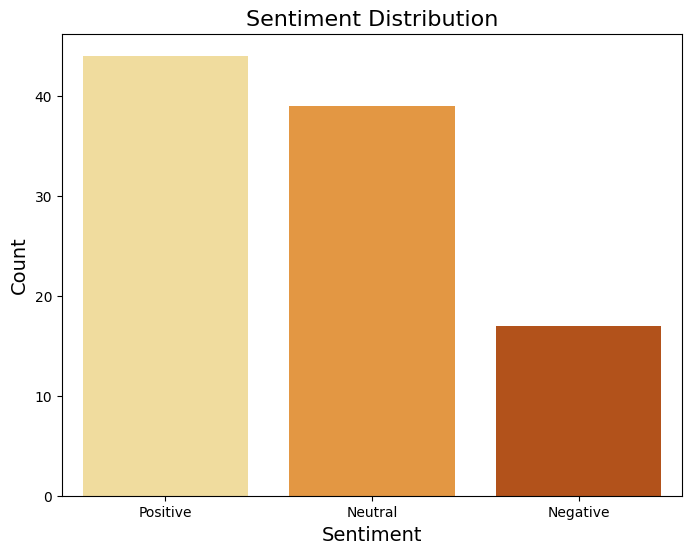

In [ ]:
# Count the occurrences of each sentiment category
sentiment_counts = df["Sentiment"].value_counts()

# Set up the plot
plt.figure(figsize=(8, 6))
# Use the colormap to generate a list of colors for the palette
palette = sns.color_palette("YlOrBr", n_colors=len(sentiment_counts))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=palette)

# Add labels and title
plt.title('Sentiment Distribution', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.show();


Ok, so, as we can see, the amount of positive comments is a lot greater than those that are negative.

In [ ]:
print("Number of positive comments:{}".format(len(df[df["Sentiment"]=="Positive"])))
print("Number of negative comments:{}".format(len(df[df["Sentiment"]=="Negative"])))
print("Number of neutral comments:{}".format(len(df[df["Sentiment"]=="Neutral"])))

Number of positive comments:44
Number of negative comments:17
Number of neutral comments:39


WordCloud

Let's have a quick overview of the most used words in the corpus of our extracted comments.

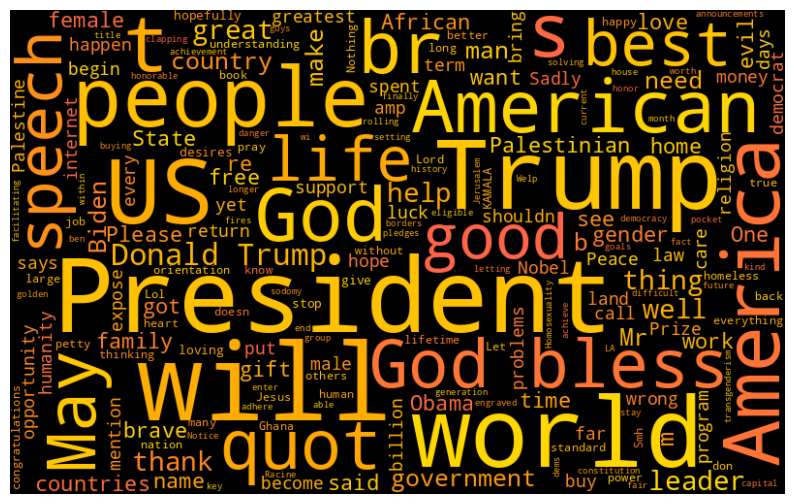

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
pos_comments = df['text'][df['Sentiment'] == 'Positive']
txt_pos = ' '.join([text for text in df['text'][df['Sentiment'] == 'Positive']])


# Define a custom yellow-orange gradient
colors = ["#FFD700", "#FFA500", "#FF6347"]  # Gold, Orange, and a little Coral
custom_cmap_pos = LinearSegmentedColormap.from_list("yellow_orange", colors)

# Generate the word cloud with the yellow-orange gradient
wordcloud_pos = WordCloud(width=800, height=500,
                           random_state=21, max_font_size=110,
                           colormap=custom_cmap_pos).generate(txt_pos)

# Plot it
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis('off')
plt.show()






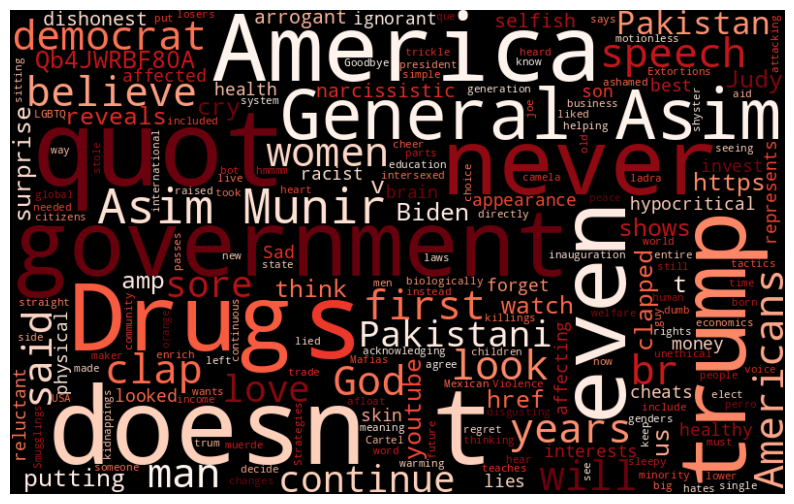

In [ ]:
# Negative comments
neg_comments = df['text'][df['Sentiment'] == 'Negative']
txt_neg = ' '.join([text for text in df['text'][df['Sentiment'] == 'Negative']])

# Create the word cloud with custom orange and reddish tones
wordcloud_neg = WordCloud(width=800, height=500,
                           random_state=21, max_font_size=110,
                           colormap='Reds').generate(txt_neg)  # Using 'Reds' colormap

# Plot the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis('off')  # Hide the axis
plt.show()

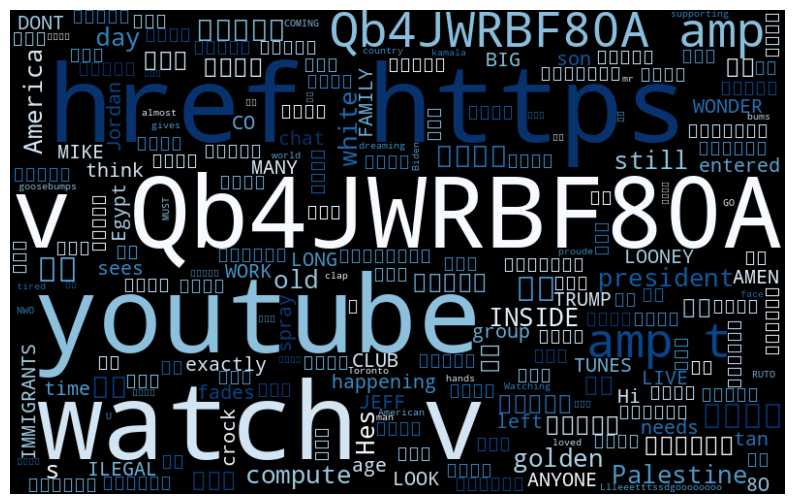

In [ ]:
# Neutral comments
neu_comments = df['text'][df['Sentiment'] == 'Neutral']
txt_neu = ' '.join([text for text in df['text'][df['Sentiment'] == 'Neutral']])

# Create the word cloud with a cool blue color palette
wordcloud_neu = WordCloud(width=800, height=500,
                           random_state=21, max_font_size=110,
                           colormap='Blues').generate(txt_neu)

# Plot the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_neu, interpolation="bilinear")
plt.axis('off')  # Hide the axis
plt.show()


Let's admit that the word Trump appearing in the three comparisons as one of the most used words was really not suprising at all. As for the positive tweets, "God" and "President" seem to be the second most common word (I suppose it's due to the amount of people who actually were praying for this outcome-although let's make no assumptions-), for the negative comments it seems to be a tie between "validated" and "criminal", and for our neutral analysis it seems to be a tie between "see" and "guy". 💡


## Text Transformation and Normalization

Text needs to be cleaned because things like emojis won't really help us

In [ ]:
stop_words = stopwords.words('english')
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()
snowball_stemmer = SnowballStemmer('english')
lzr = WordNetLemmatizer()


In [ ]:
def text_processing(text):
    # let's convert to lower case for better management
    text = text.lower()

    # and remove new line characters in text
    text = re.sub(r'\n', ' ', text)

    # we will also remove punctuation from text
    text = re.sub('[%s]' % re.escape(punctuation), "", text)

    # reference hashtags can be bothersome, so we'll remove those as well
    text = re.sub("^a-zA-Z0-9$,.","",text)

    # emojis are no use, so let's get rid of those
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # This removes non-ASCII characters (which includes emojis)

    # let's also remove multiple spaces from the text
    text = re.sub(r'\s+', ' ', text, flags=re.I)

    # and special characters
    text = re.sub(r'\W', ' ', text)

    text = ' '.join([word for word in word_tokenize(text) if word not in stop_words])

    # Now we can use the porter stemmer

    text = ' '.join([porter_stemmer.stem(word) for word in word_tokenize(text)])
    text = ' '.join([lancaster_stemmer.stem(word) for word in word_tokenize(text)])
    text = ' '.join([snowball_stemmer.stem(word) for word in word_tokenize(text)])

    # And finally, let's use WordNetLemmatizer
    text = ' '.join([lzr.lemmatize(word) for word in word_tokenize(text)])

    return text


In [ ]:
nltk.download('omw-1.4')
df_ = df['text'].apply(text_processing)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,author,published_at,updated_at,like_count,text,Sentiment
0,@gunbileg1234hh,2025-02-10T12:38:08Z,2025-02-10T12:38:08Z,0,i think 8O,Neutral
1,@gunbileg1234hh,2025-02-10T12:36:52Z,2025-02-10T12:36:52Z,0,how old is he????,Neutral
2,@abushrara9504,2025-02-09T03:17:51Z,2025-02-09T03:17:51Z,0,Mr Trump gives us announcements when you are o...,Positive
3,@Hristiyan1991,2025-02-08T09:51:17Z,2025-02-08T09:51:17Z,0,People...Some of the dems are clapping. There ...,Positive
4,@Blerbon86,2025-02-07T03:49:33Z,2025-02-07T03:49:33Z,0,"<a href=""https://www.youtube.com/watch?v=Qb4JW...",Negative


I know what you're thinking, what in the name of code and technicality is going on here? Let's go step by setp to understand what in the name of Gandalf 🧙‍♂️ is gpoing on here:

* **Converting the text to lowercase** 🔤: This one's pretty straightforward. It turns all the letters in the text into small letters (a-z). Why? Because it's easier to work with text when everything is in the same case.

* **Removing new lines** 📝: It removes any new lines (those big gaps when you press "Enter"). Instead of a line break, it puts a single space. This helps keep the text looking cleaner.

* **Removing punctuation** ❌✂️: All the little punctuation marks like !, ?, ,, and . are removed. It’s like saying, “Hey, I don't need these extra marks, just the words please!”

* **Removing unwanted characters like hashtags** 🔥: This part is trying to remove things like hashtags or other random characters that might not be needed. It’s a way of cleaning things up.

* **Removing emojis** 🚫😊: This step is saying, "I don't need emojis in my analysis!" It removes all the fun little smiley faces, hearts, and other symbols that aren’t normal letters or numbers.

* **Getting rid of extra spaces** ✨: Sometimes there are extra spaces, like double spaces, which make the text messy. This cleans it up by turning any extra spaces into just one space.

* **Removing special characters** ❌💥: This part removes any weird symbols that aren’t words or numbers. It's just getting rid of the clutter.

* **Removing "stop words" (common words like "the", "a", "in", etc.)** 🚪: "Stop words" are words that are really common (like "a", "the", "is", etc.) and don’t add much meaning. This code gets rid of those, so the analysis focuses on the important words.

* **Stemming** 🔨: Stemming is like chopping off the extra parts of words to make them simpler. For example, "running" becomes "run". This helps group similar words together.

There are three types of stemmers here (porter_stemmer, lancaster_stemmer, snowball_stemmer). They all do the same thing, but in slightly different ways. So the code tries all of them, just to be thorough.

* **Lemmatization** 🍃: Lemmatization is like stemming but smarter. It turns words into their base form (like "better" becomes "good"). This makes the text even more "normal" for analysis.

**Conclusion:**
The final text comes out cleaner, simpler, and more useful to be used in our sentiment analysis! 💥 Instead of analyzing every little detail (like emojis, stop words, etc.), the code cleans it up so the focus is on the important words. This way, the analysis can better understand the real meaning of the text. 😉


-----------------------------------------------------------------------------

So overall, this homongous code is like cleaning your room before you try to understand it! 🧹✨ It gets rid of clutter (emojis, stop words, etc.) so the important things (words that show feelings or opinions) stand out.

In [ ]:
# Now we need to assign some labels to our sentiment analysis. Typically we'll have 0=Negative, 1=Neutral, and 2=Positve
le= LabelEncoder()
df['Sentiment']=le.fit_transform(df['Sentiment'])
df.head()

,author,published_at,updated_at,like_count,text,Sentiment
0,@gunbileg1234hh,2025-02-10T12:38:08Z,2025-02-10T12:38:08Z,0,i think 8O,1
1,@gunbileg1234hh,2025-02-10T12:36:52Z,2025-02-10T12:36:52Z,0,how old is he????,1
2,@abushrara9504,2025-02-09T03:17:51Z,2025-02-09T03:17:51Z,0,Mr Trump gives us announcements when you are o...,2
3,@Hristiyan1991,2025-02-08T09:51:17Z,2025-02-08T09:51:17Z,0,People...Some of the dems are clapping. There ...,2
4,@Blerbon86,2025-02-07T03:49:33Z,2025-02-07T03:49:33Z,0,"<a href=""https://www.youtube.com/watch?v=Qb4JW...",0


In [ ]:
df['Sentiment'].value_counts()

,count
Sentiment,
2,44
1,39
0,17


So far, we are seeing more positive comments, followed by neutral.

In [ ]:
# Now, our set so far is balanced, however, if you have some unbalanced data, here's how you can work through that:
#df_neutral = df[df['Sentiment'] == 1]
#df_positive = df[df['Sentiment'] == 2]
#df_negative = df[df['Sentiment'] == 0]

#unsample minority classes
#df_negative_unsampled = resample(df_negative, replace=True, n_samples=len(df_positive), random_state=42)
#df_neutral_unsampled = resample(df_neutral, replace=True, n_samples=len(df_positive), random_state=42)

# Concatenate the unsampled dataframes
#final_data = pd.concat([df_positive, df_negative_unsampled, df_neutral_unsampled])

# Shuffle the final dataset
#final_data = final_data.sample(frac=1, random_state=42).reset_index(drop=True)

#final_data['Sentiment'].value_counts()

In [ ]:
# Apply text processing to the 'text' column and create 'processed_text' column
df['processed_text'] = df['text'].apply(text_processing)

corpus = []
for text in df['processed_text']:
    corpus.append(text_processing(text))
# Display the first 5 elements of the corpus (optional)
corpus[0:5]

['think 8o',
 'old',
 'mr trump giv u annount rol law mak tim doachiev gold goal gen opportun world fut wel mak hap thank',
 'peoplesom dem clap hop',
 'hrefhttpswwwyoutubecomwatchvqb4jwrbf80aampt590950a bid look lik cri']

## Vectorization

Now that we've completed the Normalization of our data, we are up to vectorizing it. But why vectorize? Well the answer is because this will allow us to convert text into numerical representations that machine learning models can understand. This will allow us to transform the processed text into a form that can be fed into a model for sentiment classification.

There are 3 common methods to do this, but we'll be using only the first two for this simple sentiment analysis:

**1. Bag-of-Words (BoW):** This creates a matrix where each row represents a document and each column represents a word from the entire corpus. The value at each position represents the frequency of the word in the document. It’s simple and often effective, but it can result in sparse matrices.

**2.TF-IDF (Term Frequency-Inverse Document Frequency):** Similar to BoW but with a twist—it gives more weight to words that are rare across documents but common within a document. This is usually more informative than BoW, as it helps to highlight important terms.

**3.Word2Vec / GloVe / FastText:** These are pre-trained embeddings that map words to dense vectors, capturing semantic relationships between words. These approaches can capture more complex word meanings and contexts compared to BoW or TF-IDF.

##Vectorizing with TF-IDF:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Apply text processing to the 'text' column
df['processed_text'] = df['text'].apply(text_processing)

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the max_features parameter

# Fit and transform the training data (i.e., the processed text) and transform the test data
X_tfidf = tfidf_vectorizer.fit_transform(df['processed_text'])
y = df['Sentiment']  # Sentiment labels (Positive, Negative, Neutral)

# Check the shape of the resulting matrix
print(f"TF-IDF Matrix Shape: {X_tfidf.shape}")


TF-IDF Matrix Shape: (100, 637)


## Vectorizing with Bag-of-Words (Optional Alternative):

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Apply text processing to the 'text' column
df['processed_text'] = df['text'].apply(text_processing)

# Initialize CountVectorizer (Bag-of-Words)
count_vectorizer = CountVectorizer(max_features=5000)  # Adjust the max_features parameter

# Fit and transform the training data (i.e., the processed text) and transform the test data
X_bow = count_vectorizer.fit_transform(df['processed_text'])
y = df['Sentiment']  # Sentiment labels (Positive, Negative, Neutral)

# Check the shape of the resulting matrix
print(f"Bag-of-Words Matrix Shape: {X_bow.shape}")


Bag-of-Words Matrix Shape: (100, 637)


In [ ]:
# Creating the model
from sklearn.model_selection import train_test_split

# Creating the model
from sklearn.model_selection import train_test_split

# Split into training and testing sets (80% training, 20% testing)
# X should be the original 'processed_text' column, not the previously vectorized data
X_train, X_test, y_train, y_test = train_test_split(df['processed_text'], y, test_size=0.2, random_state=42)

# Use tfidf_vectorizer to transform the training and testing data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)  # Assuming you want to use TF-IDF
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"Training data shape: {X_train_tfidf.shape}") # Print the shape of the vectorized data
print(f"Testing data shape: {X_test_tfidf.shape}") # Print the shape of the vectorized data


Training data shape: (80, 547)
Testing data shape: (20, 547)


# Training the model

We'll try training our model with at least two different modes and see which one did better. Then we'll try HuggingFace to see if our "hand made" models did better or worst.

In [ ]:
# Logistic Regression Pipeline
pipeline_lr = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('classifier', LogisticRegression(max_iter=1000))
])

# SVM Pipeline
pipeline_svm = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('classifier', SVC())
])

# Gaussian Naive Bayes Pipeline
pipeline_gnb = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('classifier', GaussianNB())
])

# Hyperparameter Grids for Tuning
param_grid_lr = {
    'classifier__C': [0.1, 1, 10],
    'classifier__solver': ['liblinear', 'saga', 'lbfgs']
}

param_grid_svm = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf', 'poly'],
    'classifier__gamma': ['scale', 'auto']
}

param_grid_gnb = {
    'classifier__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# GridSearchCV for each model
grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, n_jobs=-1)
grid_search_svm = GridSearchCV(pipeline_svm, param_grid_svm, cv=5, n_jobs=-1)
grid_search_gnb = GridSearchCV(pipeline_gnb, param_grid_gnb, cv=5, n_jobs=-1)

# Fit GridSearchCV for each model
grid_search_lr.fit(X_train_tfidf, y_train)
grid_search_svm.fit(X_train_tfidf, y_train)
grid_search_gnb.fit(X_train_tfidf.toarray(), y_train)  # Convert sparse matrix for Naive Bayes

# Cross-validation Scores
lr_scores = cross_val_score(grid_search_lr.best_estimator_, X_train_tfidf, y_train, cv=5)
svm_scores = cross_val_score(grid_search_svm.best_estimator_, X_train_tfidf, y_train, cv=5)
gnb_scores = cross_val_score(grid_search_gnb.best_estimator_, X_train_tfidf.toarray(), y_train, cv=5)

# Model Performance Comparison
models_performance = {
    'Logistic Regression': lr_scores.mean(),
    'SVM': svm_scores.mean(),
    'Gaussian Naive Bayes': gnb_scores.mean()
}


In [ ]:
# Compare the accuracy scores of all three models
# ipython-input-30-ce0d304b1c97 (add these lines at the end)

# Evaluate models on the test set and get accuracy scores
lr_accuracy = grid_search_lr.best_estimator_.score(X_test_tfidf, y_test)
svm_accuracy = grid_search_svm.best_estimator_.score(X_test_tfidf, y_test)
gnb_accuracy = grid_search_gnb.best_estimator_.score(X_test_tfidf.toarray(), y_test)  # Convert to dense for NB
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print(f"Naive Bayes Accuracy: {gnb_accuracy:.4f}")
print(f"SVM Accuracy: {svm_accuracy:.4f}")


Logistic Regression Accuracy: 0.6000
Naive Bayes Accuracy: 0.5500
SVM Accuracy: 0.6000


In [ ]:
# Best model based on mean cross-validation score
best_model_name = max(models_performance, key=models_performance.get)
print(f"The Best Model is: {best_model_name}")
print(f"Best Model Mean Cross-validation Score: {models_performance[best_model_name]}")


The Best Model is: Logistic Regression
Best Model Mean Cross-validation Score: 0.675


In [ ]:
# Best model based on mean cross-validation score
best_model_name = max(models_performance, key=models_performance.get)
print(f"The Best Model is: {best_model_name}")
print(f"Best Model Mean Cross-validation Score: {models_performance[best_model_name]}")


The Best Model is: Logistic Regression
Best Model Mean Cross-validation Score: 0.675


In general, we are good to go. But let's see if we can improve our results, and if by doing so, anything changes.



In [ ]:
# Final Evaluation on Test Set
best_model = grid_search_lr.best_estimator_ if best_model_name == 'Logistic Regression' else \
             grid_search_svm.best_estimator_ if best_model_name == 'SVM' else \
             grid_search_gnb.best_estimator_


In [ ]:
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_tfidf)
print(f"Classification Report for {best_model_name}:")
print(classification_report(y_test, y_pred))


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.88      0.64      0.74        11
           2       0.45      1.00      0.62         5

    accuracy                           0.60        20
   macro avg       0.44      0.55      0.45        20
weighted avg       0.59      0.60      0.56        20



# Hyperparameter Tuning

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# 1. **GridSearch for Logistic Regression**
param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga', 'lbfgs'],
}
log_reg_model = LogisticRegression(max_iter=1000)
grid_search_lr = GridSearchCV(log_reg_model, param_grid_lr, cv=5, n_jobs=-1)
grid_search_lr.fit(X_train_tfidf, y_train)  # Use vectorized training data
best_lr_model = grid_search_lr.best_estimator_
y_pred_lr = best_lr_model.predict(X_test_tfidf)  # Use vectorized test data
print("Best Logistic Regression Model:")
print(f"Best Parameters for Logistic Regression: {grid_search_lr.best_params_}")
print(classification_report(y_test, y_pred_lr))

# 2. **GridSearch for SVM**
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
svm_model = SVC()
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, n_jobs=-1)
grid_search_svm.fit(X_train_tfidf, y_train)  # Use vectorized training data
best_svm_model = grid_search_svm.best_estimator_
y_pred_svm = best_svm_model.predict(X_test_tfidf)  # Use vectorized test data
print("\nBest SVM Model:")
print(f"Best Parameters for SVM: {grid_search_svm.best_params_}")
print(classification_report(y_test, y_pred_svm))

# 3. **GridSearch for Gaussian Naive Bayes**
param_grid_gnb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}
gnb_model = GaussianNB()
grid_search_gnb = GridSearchCV(gnb_model, param_grid_gnb, cv=5, n_jobs=-1)
grid_search_gnb.fit(X_train_tfidf.toarray(), y_train)  # Convert to dense for NB
best_gnb_model = grid_search_gnb.best_estimator_
y_pred_gnb = best_gnb_model.predict(X_test_tfidf.toarray())  # Convert to dense for NB
print("\nBest Gaussian Naive Bayes Model:")
print(f"Best Parameters for GaussianNB: {grid_search_gnb.best_params_}")
print(classification_report(y_test, y_pred_gnb))

# 4. **Compare and Print the Best Model**
# Store all classification reports for comparison
models = {
    "Logistic Regression": {
        "model": best_lr_model,
        "report": classification_report(y_test, y_pred_lr, output_dict=True)
    },
    "SVM": {
        "model": best_svm_model,
        "report": classification_report(y_test, y_pred_svm, output_dict=True)
    },
    "GaussianNB": {
        "model": best_gnb_model,
        "report": classification_report(y_test, y_pred_gnb, output_dict=True)
    }
}

# Get the model with the highest accuracy (macro avg)
best_model_name = max(models, key=lambda model: models[model]['report']['accuracy'])
print(f"\nThe Best Model is: {best_model_name}")
print("Best Model Performance (Accuracy):")
print(models[best_model_name]['report']['accuracy'])


Best Logistic Regression Model:
Best Parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.82      0.82      0.82        11
           2       0.56      1.00      0.71         5

    accuracy                           0.70        20
   macro avg       0.46      0.61      0.51        20
weighted avg       0.59      0.70      0.63        20



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Best SVM Model:
Best Parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.80      0.73      0.76        11
           2       0.50      1.00      0.67         5

    accuracy                           0.65        20
   macro avg       0.43      0.58      0.48        20
weighted avg       0.57      0.65      0.59        20


Best Gaussian Naive Bayes Model:
Best Parameters for GaussianNB: {'var_smoothing': 1e-09}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.70      0.64      0.67        11
           2       0.50      0.80      0.62         5

    accuracy                           0.55        20
   macro avg       0.40      0.48      0.43        20
weighted avg       0.51      0.55      0.52        20


The Best Model is: Logistic Regression
Best Model Perform

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Ok there was some improvement. Still the best model is Logistic Regression with an accuracy of 0.7.

## Feature Engineering

Let's try adding bi-grams or tri-grams in our TF-IDF or Bag-of-Words vectorization. This will allow the model to capture word combinations and context, which might improve accuracy.

In [ ]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
# Fit and transform the training data and transform the test data
X = tfidf_vectorizer.fit_transform(df['processed_text'])
y = df['Sentiment']  # Target variable, assuming 'Sentiment' is your target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# 1. **GridSearch for Logistic Regression**
param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga', 'lbfgs'],
}
log_reg_model = LogisticRegression(max_iter=1000)
grid_search_lr = GridSearchCV(log_reg_model, param_grid_lr, cv=5, n_jobs=-1)
grid_search_lr.fit(X_train, y_train)
best_lr_model = grid_search_lr.best_estimator_
y_pred_lr = best_lr_model.predict(X_test)
print("Best Logistic Regression Model:")
print(f"Best Parameters for Logistic Regression: {grid_search_lr.best_params_}")
print(classification_report(y_test, y_pred_lr))

# 2. **GridSearch for SVM**
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
svm_model = SVC()
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, n_jobs=-1)
grid_search_svm.fit(X_train, y_train)
best_svm_model = grid_search_svm.best_estimator_
y_pred_svm = best_svm_model.predict(X_test)
print("\nBest SVM Model:")
print(f"Best Parameters for SVM: {grid_search_svm.best_params_}")
print(classification_report(y_test, y_pred_svm))

# 3. **GridSearch for Gaussian Naive Bayes**
param_grid_gnb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}
gnb_model = GaussianNB()
grid_search_gnb = GridSearchCV(gnb_model, param_grid_gnb, cv=5, n_jobs=-1)
grid_search_gnb.fit(X_train.toarray(), y_train)  # Convert to dense matrix for GaussianNB
best_gnb_model = grid_search_gnb.best_estimator_
y_pred_gnb = best_gnb_model.predict(X_test.toarray())
print("\nBest Gaussian Naive Bayes Model:")
print(f"Best Parameters for GaussianNB: {grid_search_gnb.best_params_}")
print(classification_report(y_test, y_pred_gnb))

# 4. **Compare and Print the Best Model**
# Store all classification reports for comparison
models = {
    "Logistic Regression": {
        "model": best_lr_model,
        "report": classification_report(y_test, y_pred_lr, output_dict=True)
    },
    "SVM": {
        "model": best_svm_model,
        "report": classification_report(y_test, y_pred_svm, output_dict=True)
    },
    "GaussianNB": {
        "model": best_gnb_model,
        "report": classification_report(y_test, y_pred_gnb, output_dict=True)
    }
}

# Get the model with the highest accuracy (macro avg)
best_model_name = max(models, key=lambda model: models[model]['report']['accuracy'])
print(f"\nThe Best Model is: {best_model_name}")
print("Best Model Performance (Accuracy):")
print(models[best_model_name]['report']['accuracy'])


Best Logistic Regression Model:
Best Parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.77      0.91      0.83        11
           2       0.57      0.80      0.67         5

    accuracy                           0.70        20
   macro avg       0.45      0.57      0.50        20
weighted avg       0.57      0.70      0.62        20



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Best SVM Model:
Best Parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       1.00      0.18      0.31        11
           2       0.28      1.00      0.43         5

    accuracy                           0.35        20
   macro avg       0.43      0.39      0.25        20
weighted avg       0.62      0.35      0.28        20



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Best Gaussian Naive Bayes Model:
Best Parameters for GaussianNB: {'var_smoothing': 1e-09}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.88      0.64      0.74        11
           2       0.56      1.00      0.71         5

    accuracy                           0.60        20
   macro avg       0.48      0.55      0.48        20
weighted avg       0.62      0.60      0.58        20


The Best Model is: Logistic Regression
Best Model Performance (Accuracy):
0.7


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

So, after all of that, metrics like Recall, F1-score and Precision did improve, but accuracy for our model remained at 0.7.

So, our model is decent, but not the best. After hyperparameter tuning, feature scaling and crossvalidation this is the best score we could get. Let's see how hugging face does, and comapre it to our best model, which in this case is Logistic Regression, with a score of 0.70.

**Note**: *Spoiler alert: I did not have the computational power, but still going to leave the code.*
In the meantime, we''l build the app with out *Best Logistic Regression Model*

# Building the Streamlit App

In [ ]:
with open("linear_regression_model.pkl", "wb") as f:
    pickle.dump(best_lr_model, f)

In [ ]:
with open("linear_regression_model.pkl", "wb") as f:
    pickle.dump(best_lr_model, f)

## Hugging Face 🤗

The pipeline from Hugging Face is used to perform sentiment analysis. It automatically selects a pre-trained model (typically DistilBERT for sentiment classification).

In [ ]:
from transformers import pipeline
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from datasets import Dataset
from transformers import RobertaTokenizer, TrainingArguments

# Set up Sentiment Analysis using Hugging Face 🚀
sentiment_analyzer = pipeline('sentiment-analysis', model='roberta-large')

# Apply sentiment analysis
df['predicted_sentiment'] = df['text'].apply(lambda x: sentiment_analyzer(x)[0]['label'])
df['confidence'] = df['text'].apply(lambda x: sentiment_analyzer(x)[0]['score'])

# Mapping sentiment labels
label_map = {
    'POSITIVE': 2,  # Positive sentiment
    'NEGATIVE': 0,  # Negative sentiment
    'NEUTRAL': 1    # Neutral sentiment
}

# Convert model's output to numerical labels
df['predicted_sentiment_encoded'] = df['predicted_sentiment'].map(label_map).fillna(1)

# Accuracy Calculation
accuracy = accuracy_score(y_test, df['predicted_sentiment_encoded'].head(len(y_test)))
print(f"Hugging Face Model Accuracy: {accuracy * 100:.2f}%")

# Precision, Recall, F1 Score
precision = precision_score(y_test, df['predicted_sentiment_encoded'].head(len(y_test)), average='weighted')
recall = recall_score(y_test, df['predicted_sentiment_encoded'].head(len(y_test)), average='weighted')
f1 = f1_score(y_test, df['predicted_sentiment_encoded'].head(len(y_test)), average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Saving results to CSV
df.to_csv('predictions.csv', index=False)

# Fine-Tuning Hugging Face Model
dataset = Dataset.from_pandas(df[['text', 'Sentiment']])

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True)

dataset = dataset.map(tokenize_function, batched=True)
dataset = dataset.rename_column('Sentiment', 'labels')

# Define the training arguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    save_strategy="epoch"
)

# Define metrics function for evaluation
def compute_metrics(p):
    preds = p.predictions.argmax(axis=1)
    labels = p.label_ids
    accuracy = accuracy_score(labels, preds)
    precision = precision_score(labels, preds, average='weighted')
    recall = recall_score(labels, preds, average='weighted')
    f1 = f1_score(labels, preds, average='weighted')

    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cpu


Hugging Face Model Accuracy: 55.00%
Precision: 0.30
Recall: 0.55
F1 Score: 0.39


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Map:   0%|          | 0/100 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, df['predicted_sentiment_encoded'].head(len(y_test)))
print(f"Accuracy: {accuracy * 100:.2f}% 📊")

# Calculate the Precision
precision = precision_score(y_test, df['predicted_sentiment_encoded'].head(len(y_test)), average='weighted')
print(f"Precision: {precision:.2f} 📈")

# Calculate the Recall
recall = recall_score(y_test, df['predicted_sentiment_encoded'].head(len(y_test)), average='weighted')
print(f"Recall: {recall:.2f} 🔍")

# Calculate the F1 Score
f1 = f1_score(y_test, df['predicted_sentiment_encoded'].head(len(y_test)), average='weighted')
print(f"F1 Score: {f1:.2f} ⚖️")

# Saving results to CSV
df.to_csv('predictions.csv', index=False)

# Display the results for review
df.head()  # Display the first few rows of the DataFrame with the true and predicted labels


Accuracy: 55.00% 📊
Precision: 0.30 📈
Recall: 0.55 🔍
F1 Score: 0.39 ⚖️


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,author,published_at,updated_at,like_count,text,Sentiment,processed_text,predicted_sentiment,confidence,predicted_sentiment_encoded
0,@gunbileg1234hh,2025-02-10T12:38:08Z,2025-02-10T12:38:08Z,0,i think 8O,1,think 8o,LABEL_1,0.672706,1.0
1,@gunbileg1234hh,2025-02-10T12:36:52Z,2025-02-10T12:36:52Z,0,how old is he????,1,old,LABEL_1,0.669448,1.0
2,@abushrara9504,2025-02-09T03:17:51Z,2025-02-09T03:17:51Z,0,Mr Trump gives us announcements when you are o...,2,mr trump giv u annount rol law mak tim doachie...,LABEL_1,0.665892,1.0
3,@Hristiyan1991,2025-02-08T09:51:17Z,2025-02-08T09:51:17Z,0,People...Some of the dems are clapping. There ...,2,peoplesom dem clap hop,LABEL_1,0.652074,1.0
4,@Blerbon86,2025-02-07T03:49:33Z,2025-02-07T03:49:33Z,0,"<a href=""https://www.youtube.com/watch?v=Qb4JW...",0,hrefhttpswwwyoutubecomwatchvqb4jwrbf80aampt590...,LABEL_1,0.664842,1.0


Our model with Hugging face performed poorly. Let's see if we can better these results.

### Hypertuning Hugging Face

In [ ]:
pip install optuna


### Warning!

I did not have enough computational power to go through this line of code, so I might have to return to the proyect and try with sosmethinga lot less demanding. But you can go ahead and try for yourself in case you have the power requiered for this not to break.

In [ ]:
import optuna
from transformers import pipeline, RobertaForSequenceClassification, Trainer, TrainingArguments, RobertaTokenizer
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from datasets import Dataset
from sklearn.model_selection import train_test_split

# Load dataset and split into training and validation sets
df = pd.read_csv('predictions.csv')  # Load your dataset here

# Split into train and validation datasets
train_df, val_df = train_test_split(df, test_size=0.2)

train_dataset = Dataset.from_pandas(train_df[['text', 'Sentiment']])
val_dataset = Dataset.from_pandas(val_df[['text', 'Sentiment']])

# Tokenize the datasets
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True)

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)

train_dataset = train_dataset.rename_column('Sentiment', 'labels')
val_dataset = val_dataset.rename_column('Sentiment', 'labels')

# Define model
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=3)

# Define the objective function for hyperparameter optimization using Optuna
def objective(trial):
    # Hyperparameters to tune
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 5e-5)
    batch_size = trial.suggest_categorical('batch_size', [8, 16, 32])
    num_epochs = trial.suggest_int('num_train_epochs', 2, 5)
    weight_decay = trial.suggest_uniform('weight_decay', 0.0, 0.1)
    warmup_steps = trial.suggest_int('warmup_steps', 0, 500)

    # Define Training Arguments
    training_args = TrainingArguments(
        output_dir='./results',
        evaluation_strategy="epoch",
        learning_rate=learning_rate,
        per_device_train_batch_size=batch_size,
        per_device_eval_batch_size=batch_size,
        num_train_epochs=num_epochs,
        weight_decay=weight_decay,
        logging_dir='./logs',
        logging_steps=10,
        load_best_model_at_end=True,
        save_strategy="epoch",
        warmup_steps=warmup_steps,
        metric_for_best_model="eval_loss",
        greater_is_better=False
    )

    # Initialize Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        tokenizer=tokenizer
    )

    # Start training and return the evaluation loss as the metric
    trainer.train()
    eval_result = trainer.evaluate()
    eval_loss = eval_result['eval_loss']

    return eval_loss



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Map:   0%|          | 0/80 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Create the study for optimization
study = optuna.create_study(direction="minimize")

# Optimize the hyperparameters
study.optimize(objective, n_trials=5)  # You can increase the number of trials for better results

# Print the best hyperparameters and corresponding loss
print(f"Best hyperparameters: {study.best_params}")
print(f"Best evaluation loss: {study.best_value}")



[I 2025-02-14 01:12:51,354] A new study created in memory with name: no-name-84ae5f74-62eb-40bf-8c7d-73e056c25ccd
<ipython-input-3-4d1831a24e0e>:35: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 5e-5)
<ipython-input-3-4d1831a24e0e>:38: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  weight_decay = trial.suggest_uniform('weight_decay', 0.0, 0.1)
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-3-4d1831a24e0e>:60: FutureWarning: `tokenizer

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: gogabrielagutierrezo02 (gogabrielagutierrezo02-personal) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Epoch,Training Loss,Validation Loss
1,1.113900,1.094086
2,1.097500,1.097329


[I 2025-02-14 01:36:47,436] Trial 0 finished with value: 1.094085693359375 and parameters: {'learning_rate': 3.436184397978156e-05, 'batch_size': 8, 'num_train_epochs': 2, 'weight_decay': 0.03353426651098972, 'warmup_steps': 172}. Best is trial 0 with value: 1.094085693359375.
<ipython-input-3-4d1831a24e0e>:35: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 5e-5)
<ipython-input-3-4d1831a24e0e>:38: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  weight_decay = trial.suggest_uniform('weight_decay', 0.0, 0.1)
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is depreca

In [ ]:

# Evaluate the model on test data after tuning
best_model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=3)
best_model.load_state_dict(study.best_trial.user_attrs['model_state_dict'])



In [ ]:
# Making predictions
sentiment_analyzer = pipeline('sentiment-analysis', model=best_model)

# Apply sentiment analysis
df['predicted_sentiment'] = df['text'].apply(lambda x: sentiment_analyzer(x)[0]['label'])
df['confidence'] = df['text'].apply(lambda x: sentiment_analyzer(x)[0]['score'])

# Mapping sentiment labels
label_map = {
    'POSITIVE': 2,  # Positive sentiment
    'NEGATIVE': 0,  # Negative sentiment
    'NEUTRAL': 1    # Neutral sentiment
}



In [ ]:
# Convert model's output to numerical labels
df['predicted_sentiment_encoded'] = df['predicted_sentiment'].map(label_map).fillna(1)


In [ ]:
#Metrics:
# Calculate the accuracy
accuracy = accuracy_score(y_test, df['predicted_sentiment_encoded'].head(len(y_test)))
print(f"Accuracy: {accuracy * 100:.2f}% 📊")

# Calculate the Precision
precision = precision_score(y_test, df['predicted_sentiment_encoded'].head(len(y_test)), average='weighted')
print(f"Precision: {precision:.2f} 📈")

# Calculate the Recall
recall = recall_score(y_test, df['predicted_sentiment_encoded'].head(len(y_test)), average='weighted')
print(f"Recall: {recall:.2f} 🔍")

# Calculate the F1 Score
f1 = f1_score(y_test, df['predicted_sentiment_encoded'].head(len(y_test)), average='weighted')
print(f"F1 Score: {f1:.2f} ⚖️")

# Saving results to CSV
df.to_csv('predictions.csv', index=False)

# Display the results for review
df.head()  # Display the first few rows of the DataFrame with the true and predicted labels


## **Compare Training vs. Evaluation Loss:**

If the training loss is significantly lower than the evaluation loss, that’s a good sign of overfitting.
The model might have memorized the training data and is unable to generalize well to the test data.

In [ ]:
# After training, let's look at the losses
train_loss = trainer.state.log_history[-1]['loss']  # Last training loss
eval_loss = trainer.state.log_history[-1]['eval_loss']  # Last evaluation loss

print(f"Training Loss: {train_loss:.4f}")
print(f"Evaluation Loss: {eval_loss:.4f}")


## **Check Accuracy for Both Training and Evaluation:**

In the compute_metrics function, we already compute accuracy during training. Let’s compare training accuracy and evaluation accuracy to assess overfitting:

In [ ]:
# Get the latest metrics from training history
train_accuracy = trainer.state.log_history[-1]['accuracy']  # Latest training accuracy
eval_accuracy = trainer.state.log_history[-1]['eval_accuracy']  # Latest eval accuracy

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Evaluation Accuracy: {eval_accuracy:.4f}")


In [ ]:
# Test the model
test_results = trainer.evaluate(test_dataset)
print(f"Test Results: {test_results}")


## **Plot Training and Evaluation Losses and Accuracy:**


It’s also useful to visualize the losses and accuracies over time to spot trends and overfitting early on. You can plot both training loss and evaluation loss (along with accuracy) to track if the model's performance starts to plateau or degrade on the validation set while still improving on the training set.

If the training loss keeps decreasing, but the evaluation loss increases or stagnates, and if the evaluation accuracy starts to drop while training accuracy keeps improving, it’s an indication of overfitting.

In [ ]:
import matplotlib.pyplot as plt

# Extract logs for plotting
train_losses = [x['loss'] for x in trainer.state.log_history if 'loss' in x]
eval_losses = [x['eval_loss'] for x in trainer.state.log_history if 'eval_loss' in x]
train_accuracies = [x['accuracy'] for x in trainer.state.log_history if 'accuracy' in x]
eval_accuracies = [x['eval_accuracy'] for x in trainer.state.log_history if 'eval_accuracy' in x]

# Plot the losses
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(eval_losses, label='Evaluation Loss')
plt.title('Training vs. Evaluation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot the accuracies
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(eval_accuracies, label='Evaluation Accuracy')
plt.title('Training vs. Evaluation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


## **Evaluate on Test Set:**

After training, always evaluate on a separate test set that the model hasn’t seen before. This will give you a better idea of how well the model generalizes.

In [ ]:
# Test the model
test_results = trainer.evaluate(test_dataset)
print(f"Test Results: {test_results}")


In [ ]:
# Evaluation metrics

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

def compute_metrics(p):
    preds = p.predictions.argmax(axis=1)
    labels = p.label_ids
    accuracy = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average='weighted')
    conf_matrix = confusion_matrix(labels, preds)
    return {'accuracy': accuracy, 'f1_score': f1, 'confusion_matrix': conf_matrix}


In [ ]:
# Confussion matrix
conf_matrix = test_results['eval_confusion_matrix']

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['NEGATIVE', 'NEUTRAL', 'POSITIVE'],
            yticklabels=['NEGATIVE', 'NEUTRAL', 'POSITIVE'])

# Add labels and title
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
